### Overview:
The dataset includes detailed information on track names, artist names, release dates, streaming statistics, presence on music charts and playlists, and various audio features of the songs. This rich dataset offers a unique lens through which to examine what makes music resonate with listeners and achieve widespread acclaim.

### What We Have Done:
1. Data Loading and Cleaning: Loaded the dataset, identified and addressed data quality issues such as non-numeric streams data, ensuring a clean and analysis-ready dataset.

2. Data Visualization: Employed various types of visualizations to uncover insights from the dataset:

- Line Charts to visualize trends in the number of songs released over the years.
- Bar Charts to compare the average streams among the top artists.
- Heatmaps to explore correlations between different numerical audio features.
- Scatter Plots to investigate the relationship between streams and danceability, among other quantitative variables.
3. Insight Generation: Analyzed the visualizations to identify patterns, anomalies, and insights regarding song popularity, audio features, and their implications on streaming success.

This concise exploration aims to provide foundational insights into the dynamics of music popularity, underpinning future in-depth analyses and predictive modeling endeavors.



For an overview of the data columns, go to the website linked below.
https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data

Import necessary libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the dataset

In [67]:
df = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin-1')

In [68]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Part 1: Line Charts - Trend of Songs Released Over the Years

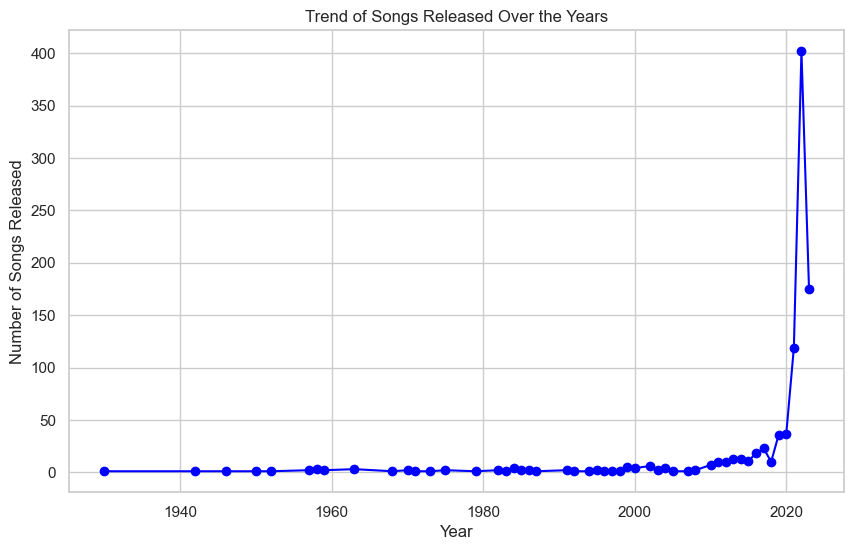

In [70]:
# Group data by 'released_year' and count the number of songs each year
yearly_trend = df.groupby('released_year').size()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-', color='blue')
plt.title('Trend of Songs Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.grid(True)
plt.show()

## Part 2: Bar Charts - Average Streams by Top Artists

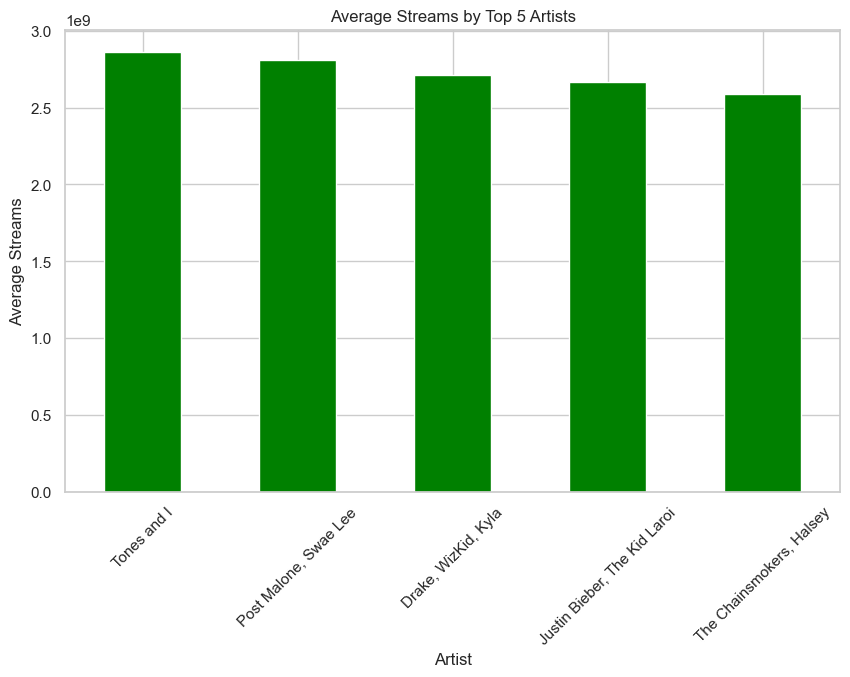

In [71]:
# Convert 'streams' column to numeric, handling non-numeric values
df['streams'] = pd.to_numeric(df['streams'], errors='coerce').fillna(0)

# Calculate average streams for each artist and get the top 5
top_artists_avg_streams = df.groupby('artist(s)_name')['streams'].mean().nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
top_artists_avg_streams.plot(kind='bar', color='green')
plt.title('Average Streams by Top 5 Artists')
plt.xlabel('Artist')
plt.ylabel('Average Streams')
plt.xticks(rotation=45)
plt.show()

## Part 3: Heatmaps - Correlations Between Audio Features

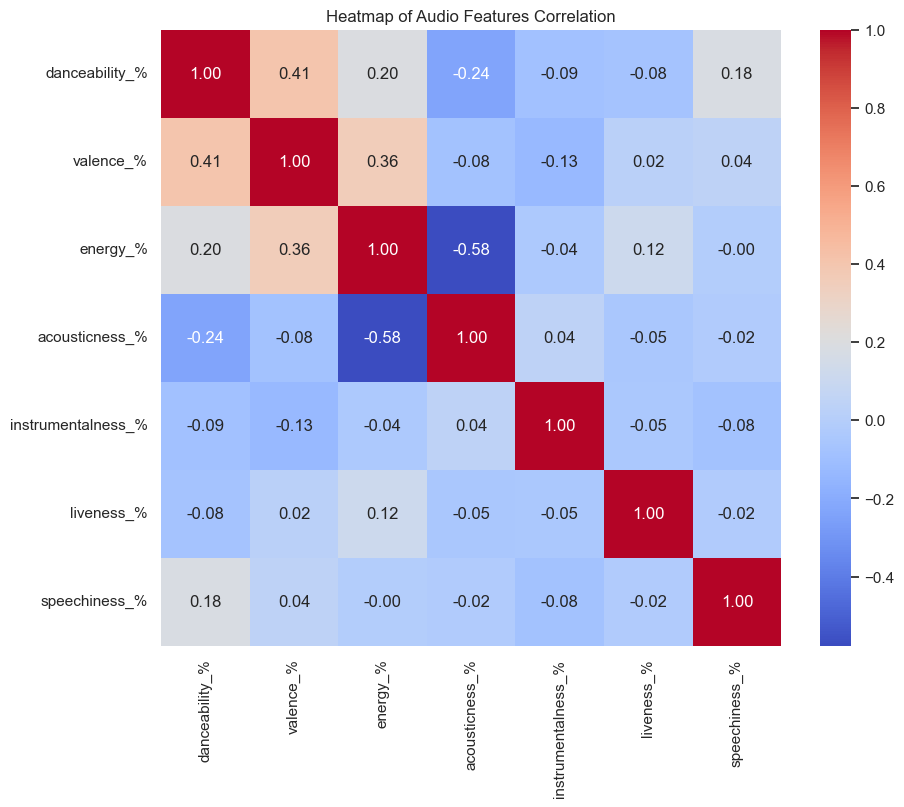

In [72]:
# Select numerical audio feature columns for the correlation matrix
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
corr_matrix = df[features].corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Audio Features Correlation')
plt.show()

## Part 4: Scatter Plots - Relationship Between Streams and Danceability

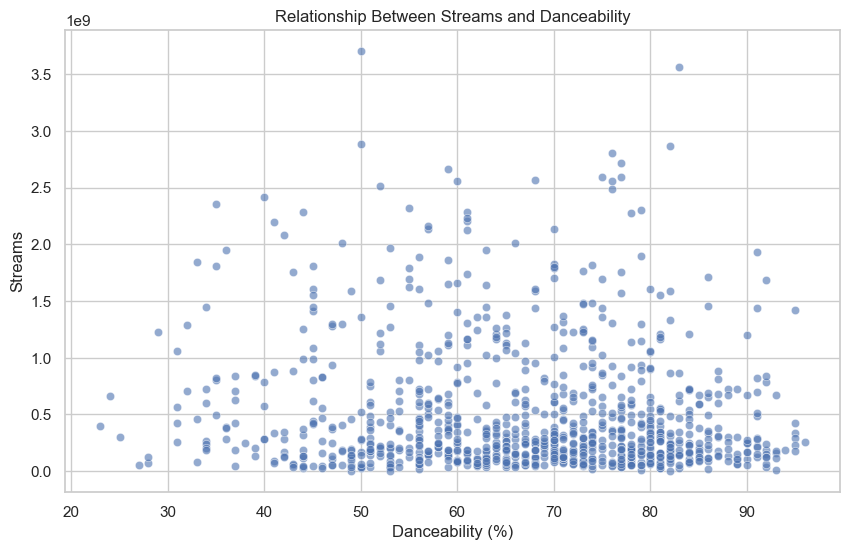

In [73]:
# Ensure 'streams' and 'danceability_%' are numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability_%', y='streams', alpha=0.6)
plt.title('Relationship Between Streams and Danceability')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')
plt.show()

## Visualization Results and Analysis
Part 1: Line Chart - Trends of Songs Released Over the Years
The line chart shows the number of songs released each year. This visualization could highlight trends such as an increase or decrease in productivity over time or specific years with notable peaks or dips, which could be further investigated to understand the underlying causes (e.g., changes in industry practices, significant global events).

Part 2: Bar Chart - Average Streams by Top 5 Artists
The bar chart illustrates the average streams of the top 5 artists, providing insights into which artists have the highest engagement or popularity on streaming platforms. This can help identify the most influential artists in the dataset and suggest trends in listener preferences or the impact of promotional strategies.

Part 3: Heatmap - Correlations Between Audio Features
The heatmap displays correlations between various audio features such as danceability, energy, valence, and others. Strong correlations (either positive or negative) indicate relationships between these features, which can suggest patterns in music production or preferences in listening habits. For instance, a strong positive correlation between danceability and energy might suggest that more energetic tracks tend to be more danceable, a trend that could influence production decisions in certain genres.

Part 4: Scatter Plot - Relationship Between Streams and Danceability
The scatter plot explores the relationship between the streams a song receives and its danceability. This visualization can reveal trends or patterns, such as whether more danceable songs tend to accumulate more streams, suggesting a preference among listeners for danceable music. It can also help in identifying outliers or anomalies that deviate from general trends, which could be tracks with unique characteristics that either underperform or overperform relative to their danceability.